<a href="https://colab.research.google.com/github/Guilhermeslsand/Python/blob/main/lista_interpolacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [55]:
def interpolacao_linear(X,grau,valor):
  #x é a tabela de informações
  [nLinhas,nColunas] = X.shape
  A = np.copy(X[0,:])
  B = np.copy(X[1,:])
  Bc = np.resize(B,(len(B),1))
  Ac = np.zeros([len(A),grau+1],dtype='float')
  for i in range(0,len(A)):
    for j in range(0,grau+1):
      Ac[j,i] = A[j]**i
  for i in range(0,len(Ac)):
    pivo = Ac[i,i]
    Ac[i,:] = Ac[i,:]/pivo
    Bc[i] = Bc[i]/pivo
    for j in range(0,len(Ac)):
      if j!=i:
        m = Ac[j,i]
        Ac[j,:] = Ac[j,:] - m*Ac[i,:]
        Bc[j] = Bc[j] - m*Bc[i]
    result = 0
    for i in range(0,grau+1):
      result = result + Bc[i]*valor**i
  return (result)


<h1>Questão 1</h1>
<h2>item a)</h2>

In [159]:
n1 = int(input('Quantos pontos você está usando?:'))

Quantos pontos você está usando?:2


In [154]:
X = np.zeros([2,n1],dtype='float')
for i in range(0,2):
  for j in range(0,n1):
    if i == 0:
      X[i,j] = float(input(f'Digite o valor do x{j}:'))
    elif i == 1:
      X[i,j] = float(input(f'Digite o valor de fx{j}:'))


Digite o valor do x0:8
Digite o valor do x1:12
Digite o valor de fx0:0.9030900
Digite o valor de fx1:1.0791812


In [160]:
grau = n1-1
resultado = interpolacao_linear(X,grau,10)
print(1-resultado)

[0.0088644]


In [60]:
esperado = math.log(10,10)
erro_rel = abs(esperado - resultado)/abs(esperado)
print(f'Erro relativo percentual:{erro_rel*100}%')

Erro relativo percentual:[0.88644]%


<h2>item b)</h2>

In [162]:
n1 = int(input('Quantos pontos você está usando?:'))

Quantos pontos você está usando?:2


In [163]:
X = np.zeros([2,n],dtype='float')
for i in range(0,2):
  for j in range(0,n):
    if i == 0:
      X[i,j] = float(input(f'Digite o valor do x{j}:'))
    elif i == 1:
      X[i,j] = float(input(f'Digite o valor de fx{j}:'))

Digite o valor do x0:9
Digite o valor do x1:11
Digite o valor de fx0:0.9543435
Digite o valor de fx1:1.0413927


In [165]:
grau = n1 -1
resultado = interpolacao_linear(X,grau,10)
print(resultado)

[0.9978681]


In [ ]:
esperado = math.log(10,10)
erro_rel = abs(esperado - resultado)/abs(esperado)
print(f'Erro relativo percentual:{erro_rel*100}')

Erro relativo percentual:[0.21824]


<h1>Questão 2</h2>

In [122]:
#X é uma array para os valores de x
# F é uma tebla que armazena os arrays com os valores de f(x) de acordo como a ordem
n2 = int(input('Quantos pontos você está usando?:'))


Quantos pontos você está usando?:3


In [124]:
grau = n2-1
tab2 = np.zeros([n2,n2+1],dtype='float')
for j in range(0,2):
  for i in range(0,n2):
    if j == 0:
      tab2[i,j] = float(input(f'Digite o valor do x{i}:'))
    elif j == 1:
      tab2[i,j] = float(input(f'Digite o valor de fx{i}:'))
print(tab2)

Digite o valor do x0:8
Digite o valor do x1:9
Digite o valor do x2:11
Digite o valor de fx0:0.9030900
Digite o valor de fx1:0.9542425
Digite o valor de fx2:1.0413927
[[ 8.         0.90309    0.         0.       ]
 [ 9.         0.9542425  0.         0.       ]
 [11.         1.0413927  0.         0.       ]]


In [125]:
def matriz_vandermond(X):
  mat_pol = np.copy(X)
  graup = len(mat_pol[0])-1
  passo = 1
  [nlinhas,ncolunas] = mat_pol.shape
  for j in range(1,ncolunas-1):
    for i in range(0,nlinhas-1):
      if i+passo < nlinhas:
        div = mat_pol[i+passo][0] - mat_pol[i][0]
        dif = mat_pol[i+1][j]- mat_pol[i][j]
        mat_pol[i][j+1] = dif/div
    passo = passo + 1
  return mat_pol

In [126]:
mat = matriz_vandermond(tab2)
print(mat)

[[ 8.0000000e+00  9.0309000e-01  5.1152500e-02 -2.5258000e-03]
 [ 9.0000000e+00  9.5424250e-01  4.3575100e-02  0.0000000e+00]
 [ 1.1000000e+01  1.0413927e+00  0.0000000e+00  0.0000000e+00]]


In [177]:
def polinomio_newton(mat,x,grau=len(mat[:,0]),inicio = 0):
  i = inicio
  vet = []
  soma = 0
  for j in range(1,grau+2):
    product = 1
    if j == 1:
      soma = mat[i][j]
    else:
      for k in range(0,j):
        product = (x-mat[k][0]) * product
      soma = soma + (product*mat[i][j])
  return soma

In [170]:
resultado = polinomio_newton(mat,10,2)
print(resultado)


1.0104466


In [171]:
esperado = math.log(10,10)
erro_rel = abs(esperado - resultado)/abs(esperado)
print(f'Erro relativo percentual:{erro_rel*100}%')

Erro relativo percentual:1.0446600000000084%


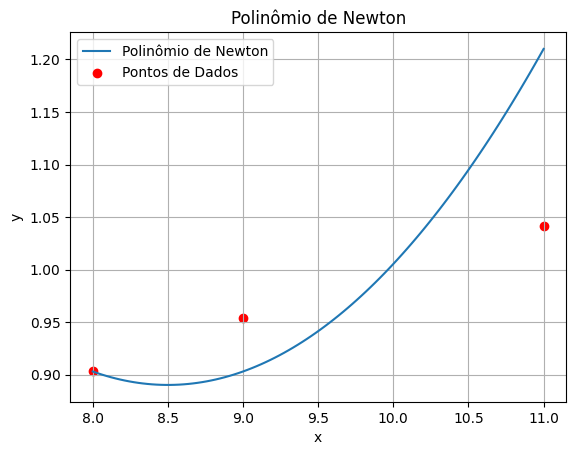

In [78]:
min = mat[0][0]
max = mat[n2-1][0]
x = np.linspace(min,max,100)
y = []
for i in x:
  y.append(polinomio_newton(mat, i, 2))
# Plotando o gráfico
plt.plot(x, y, label='Polinômio de Newton')
# Pontos de dados
pontos_x = mat[:, 0]
pontos_y = mat[:, 1]
plt.scatter(pontos_x, pontos_y, color='red', label='Pontos de Dados')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polinômio de Newton')
plt.grid(True)
plt.show()

<h1>Questão 3</h1>




In [172]:
n3 = int(input('Quantos pontos vai ser utilizado?:'))

Quantos pontos vai ser utilizado?:6


In [192]:
tab3 = np.zeros([n3,n3+1],dtype='float')
for j in range(0,2):
  for i in range(0,n3):
    if j == 0:
      tab3[i,0] = float(input(f'Digite o valo1r do x{i}:'))
    elif j == 1:
      tab3[i,1] = float(input(f'Digite o valor de fx{i}:'))

Digite o valo1r do x0:1.6
Digite o valo1r do x1:2
Digite o valo1r do x2:2.5
Digite o valo1r do x3:3.2
Digite o valo1r do x4:4
Digite o valo1r do x5:4.5
Digite o valor de fx0:2
Digite o valor de fx1:8
Digite o valor de fx2:14
Digite o valor de fx3:15
Digite o valor de fx4:8
Digite o valor de fx5:2


In [174]:
print(tab3)

[[ 1.6  2.   0.   0.   0.   0.   0. ]
 [ 2.   8.   0.   0.   0.   0.   0. ]
 [ 2.5 14.   0.   0.   0.   0.   0. ]
 [ 3.2 15.   0.   0.   0.   0.   0. ]
 [ 4.   8.   0.   0.   0.   0.   0. ]
 [ 4.5  2.   0.   0.   0.   0.   0. ]]


In [199]:
mat = matriz_vandermond(tab3)

<h1>Item a)</h1>

<h2>Primeira ordem</h2>

In [198]:
resultado1 = polinomio_newton(mat,2.8,grau=1,inicio=2)
print(resultado1)

15.37142857142857


<h2>Segunda ordem</h2>

In [183]:
resultado2 = polinomio_newton(mat,2.8,grau=2,inicio=1)
print(resultado2)

16.982857142857142


<h2>Terceira ordem</h2>

In [186]:
resultado3 = polinomio_newton(mat,2.8,grau=3,inicio=1)
print(resultado3)

16.866285714285713


<h2>Item b)</h2>

In [189]:
f0 = polinomio_newton(mat,2.8,grau=0,inicio=0)
f1 = polinomio_newton(mat,2.8,grau=1,inicio=2)
f2 = polinomio_newton(mat,2.8,grau=2,inicio=1)
f3 = polinomio_newton(mat,2.8,grau=3,inicio=1)
f4 = polinomio_newton(mat,2.8,grau=4,inicio=0)
f5 = polinomio_newton(mat,2.8,grau=5,inicio=0)

r1 = f1 -f0
r2 = f2 -f1
r3 = f3 -f2
r4 = f4 -f3
r5 = f5 -f4

print(f'R1 = {r1}\n')
print(f'R2 = {r2}\n')
print(f'R3 = {r3}\n')
print(f'R4 = {r4}\n')
print(f'R5 = {r5}\n')

R1 = 13.37142857142857

R2 = 1.611428571428572

R3 = -0.11657142857142944

R4 = -0.7765714285714296

R5 = 0.11307428571428702



<h1> Questão 4</h1>

In [190]:
n4 = int(input('Quantos pontos vai ser utilizado?:'))

Quantos pontos vai ser utilizado?:6


In [193]:
tab4 = np.zeros([n4,n4+1],dtype='float')
grau = n4-1
for j in range(0,2):
  for i in range(0,n4):
    if j == 0:
      tab4[i,0] = float(input(f'Digite o valo1r do x{i}:'))
    elif j == 1:
      tab4[i,1] = float(input(f'Digite o valor de fx{i}:'))

Digite o valo1r do x0:1
Digite o valo1r do x1:2
Digite o valo1r do x2:3
Digite o valo1r do x3:5
Digite o valo1r do x4:7
Digite o valo1r do x5:8
Digite o valor de fx0:3
Digite o valor de fx1:6
Digite o valor de fx2:19
Digite o valor de fx3:99
Digite o valor de fx4:291
Digite o valor de fx5:444


In [195]:
print(tab4)

[[  1.   3.   0.   0.   0.   0.   0.]
 [  2.   6.   0.   0.   0.   0.   0.]
 [  3.  19.   0.   0.   0.   0.   0.]
 [  5.  99.   0.   0.   0.   0.   0.]
 [  7. 291.   0.   0.   0.   0.   0.]
 [  8. 444.   0.   0.   0.   0.   0.]]


In [203]:
mat = matriz_vandermond(tab4)
print(mat)

[[  1.   3.   3.   5.   1.   0.   0.]
 [  2.   6.  13.   9.   1.   0.   0.]
 [  3.  19.  40.  14.   1.   0.   0.]
 [  5.  99.  96.  19.   0.   0.   0.]
 [  7. 291. 153.   0.   0.   0.   0.]
 [  8. 444.   0.   0.   0.   0.   0.]]


<h1>Primeira ordem</h1>

In [208]:
resultado1 = polinomio_newton(mat,4,grau=1,inicio=1)
print(resultado1)

84.0


<h1>Segunda Ordem</h1>

In [210]:
resultado2 = polinomio_newton(mat,4,grau=2,inicio=0)
print(resultado2)

51.0


<h1>Terceira Ordem</h1>

In [217]:
esultado3 = polinomio_newton(mat,4,grau=3,inicio=1)
print(resultado3)

16.866285714285713


<h1>Quarta Ordem</h1>

In [220]:
resultado4 = polinomio_newton(mat,4,grau=3,inicio=0)
print(resultado4)

45.0
